# Computing network density measures

Learning goals:
        
1. Familiarizing yourself with density measures
2. Computing density measures in Python/NetworkX
3. Communicating network density measures        

## Loading modules

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import networkx as nx
from collections import Counter

## Generate a small-world network with

In [162]:
g = nx.barabasi_albert_graph(n=100, m=5)

## Get network density metrics

### Get node degree

In [163]:
nd = [v for k, v in g.degree()]

### Average degree

In [164]:
k = np.mean(nd)

### Degree distribution

In [165]:
# get the cardinality of the degree distribution
dd = Counter(nd)

### Connectivity

In [166]:
# test if 'g' is connected
connected = nx.is_connected(g)
# get the number of connected components
connected_comps = nx.number_connected_components(g)

### Clustering

In [167]:
# node clustering
cl = nx.clustering(g)
# average node clustering
ave_cl = nx.average_clustering(g)

## Present the results

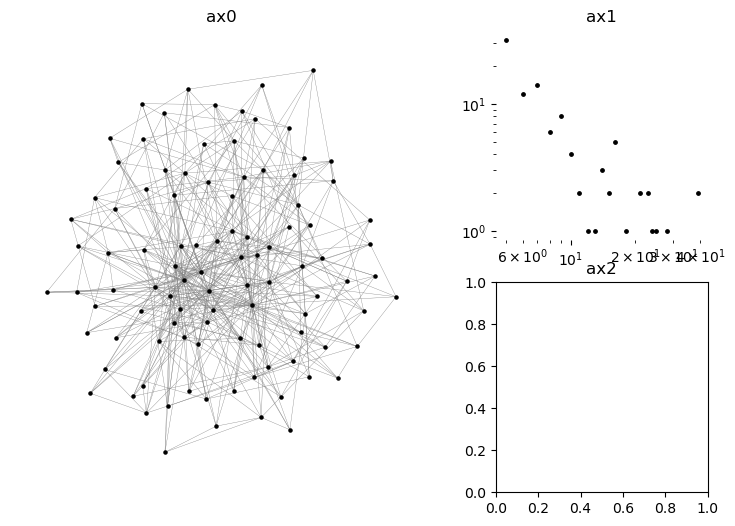

In [180]:
# create a figure
fig = plt.figure(figsize=(9, 6))
# arrange the figure around a grid
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1], height_ratios=[1, 1])
# the plots
ax0 = plt.subplot(gs[0:2, 0])
ax0.set_title("ax0")
ax1 = plt.subplot(gs[0, 1])
ax1.set_title("ax1")
ax2 = plt.subplot(gs[1, 1])
ax2.set_title("ax2")
# draw the network
pos = nx.spring_layout(g)
options = {
    "node_color": "k",
    "node_size": 5,
    "width": 0.25,
    "edge_color": "grey",
    "with_labels": False,
}
nx.draw(g, pos=pos, ax=ax0, **options)
# draw the degree distribution
ax1.scatter(dd.keys(), dd.values(), color="k", s=6)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
# set the axis off
plt.show()


In [181]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from fa2 import ForceAtlas2
from curved_edges import curved_edges

# Load the graph edges and compute the node positions using ForceAtlas2
G = nx.read_edgelist('facebook_combined.txt')
forceatlas2 = ForceAtlas2()
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=50)

# Produce the curves
curves = curved_edges(G, positions)
lc = LineCollection(curves, color='w', alpha=0.05)

# Plot
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, positions, no:wqde_size=5, node_color='w', alpha=0.4)
plt.gca().add_collection(lc)
plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
plt.show()

ModuleNotFoundError: No module named 'fa2'